<a href="https://colab.research.google.com/github/sarath9311/Python-projects/blob/main/Digital_Marketing_Campaign_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

In [ ]:
pd.read_csv('Marketing.csv')

,id,c_date,campaign_name,category,campaign_id,impressions,mark_spent,clicks,leads,orders,revenue
0,1,2021-02-01,facebook_tier1,social,349043,148263,7307.37,1210,13,1,4981.0
1,2,2021-02-01,facebOOK_tier2,social,348934,220688,16300.20,1640,48,3,14962.0
2,3,2021-02-01,google_hot,search,89459845,22850,5221.60,457,9,1,7981.0
3,4,2021-02-01,google_wide,search,127823,147038,6037.00,1196,24,1,2114.0
4,5,2021-02-01,youtube_blogger,influencer,10934,225800,29962.20,2258,49,10,84490.0
...,...,...,...,...,...,...,...,...,...,...,...
303,304,2021-02-28,instagram_tier2,social,983498,775780,760.75,1024,4,0,0.0
304,305,2021-02-28,facebook_retargeting,social,4387490,1933,224.81,58,0,0,0.0
305,306,2021-02-28,facebook_lal,social,544756,25840,6844.80,248,5,1,1491.0
306,307,2021-02-28,instagram_blogger,influencer,374754,94058,4845.65,594,12,1,5008.0


In [2]:
df = pd.read_csv('Marketing.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Marketing.csv'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             308 non-null    int64  
 1   c_date         308 non-null    object 
 2   campaign_name  308 non-null    object 
 3   category       308 non-null    object 
 4   campaign_id    308 non-null    int64  
 5   impressions    308 non-null    int64  
 6   mark_spent     308 non-null    float64
 7   clicks         308 non-null    int64  
 8   leads          308 non-null    int64  
 9   orders         308 non-null    int64  
 10  revenue        308 non-null    float64
dtypes: float64(2), int64(6), object(3)
memory usage: 26.6+ KB


In [ ]:
df['c_date'] = pd.to_datetime(df['c_date'])

# Standardize campaign names (lowercase and strip spaces)
df['campaign_name'] = df['campaign_name'].str.lower().str.strip()

# Create performance metrics
df['CTR'] = df['clicks'] / df['impressions']  # Click-Through Rate
df['CPC'] = df['mark_spent'] / df['clicks']   # Cost Per Click
df['CPL'] = df['mark_spent'] / df['leads']    # Cost Per Lead
df['CPA'] = df['mark_spent'] / df['orders']   # Cost Per Acquisition
df['ROI'] = (df['revenue'] - df['mark_spent']) / df['mark_spent']  # Return on Investment

# Handle divisions by zero or NaNs
df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
df.fillna(0, inplace=True)

# Show the updated dataframe with new metrics
df.head()


<ipython-input-8-acf3974291b5>:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(0, inplace=True)


,id,c_date,campaign_name,category,campaign_id,impressions,mark_spent,clicks,leads,orders,revenue,CTR,CPC,CPL,CPA,ROI
0,1,2021-02-01,facebook_tier1,social,349043,148263,7307.37,1210,13,1,4981.0,0.008161,6.039149,562.105385,7307.37,-0.318359
1,2,2021-02-01,facebook_tier2,social,348934,220688,16300.20,1640,48,3,14962.0,0.007431,9.939146,339.587500,5433.40,-0.082097
2,3,2021-02-01,google_hot,search,89459845,22850,5221.60,457,9,1,7981.0,0.020000,11.425821,580.177778,5221.60,0.528459
3,4,2021-02-01,google_wide,search,127823,147038,6037.00,1196,24,1,2114.0,0.008134,5.047659,251.541667,6037.00,-0.649826
4,5,2021-02-01,youtube_blogger,influencer,10934,225800,29962.20,2258,49,10,84490.0,0.010000,13.269353,611.473469,2996.22,1.819886


In [3]:
df = pd.read_csv('marketing_1.csv')
df.head()

,Unnamed: 0,id,c_date,campaign_name,category,campaign_id,impressions,mark_spent,clicks,leads,orders,revenue,CTR,CPC,CPL,CPA,ROI
0,0,1,2021-02-01,facebook_tier1,social,349043,148263,7307.37,1210,13,1,4981.0,0.008161,6.039149,562.105385,7307.37,-0.318359
1,1,2,2021-02-01,facebook_tier2,social,348934,220688,16300.20,1640,48,3,14962.0,0.007431,9.939146,339.587500,5433.40,-0.082097
2,2,3,2021-02-01,google_hot,search,89459845,22850,5221.60,457,9,1,7981.0,0.020000,11.425821,580.177778,5221.60,0.528459
3,3,4,2021-02-01,google_wide,search,127823,147038,6037.00,1196,24,1,2114.0,0.008134,5.047659,251.541667,6037.00,-0.649826
4,4,5,2021-02-01,youtube_blogger,influencer,10934,225800,29962.20,2258,49,10,84490.0,0.010000,13.269353,611.473469,2996.22,1.819886


In [4]:
campaign_summary = df.groupby('campaign_name').agg({
    'impressions': 'sum',
    'clicks': 'sum',
    'leads': 'sum',
    'orders': 'sum',
    'mark_spent': 'sum',
    'revenue': 'sum',
    'CTR': 'mean',
    'CPC': 'mean',
    'CPL': 'mean',
    'CPA': 'mean',
    'ROI': 'mean'
}).reset_index().sort_values(by='ROI', ascending=False)


In [5]:
df.head()

,Unnamed: 0,id,c_date,campaign_name,category,campaign_id,impressions,mark_spent,clicks,leads,orders,revenue,CTR,CPC,CPL,CPA,ROI
0,0,1,2021-02-01,facebook_tier1,social,349043,148263,7307.37,1210,13,1,4981.0,0.008161,6.039149,562.105385,7307.37,-0.318359
1,1,2,2021-02-01,facebook_tier2,social,348934,220688,16300.20,1640,48,3,14962.0,0.007431,9.939146,339.587500,5433.40,-0.082097
2,2,3,2021-02-01,google_hot,search,89459845,22850,5221.60,457,9,1,7981.0,0.020000,11.425821,580.177778,5221.60,0.528459
3,3,4,2021-02-01,google_wide,search,127823,147038,6037.00,1196,24,1,2114.0,0.008134,5.047659,251.541667,6037.00,-0.649826
4,4,5,2021-02-01,youtube_blogger,influencer,10934,225800,29962.20,2258,49,10,84490.0,0.010000,13.269353,611.473469,2996.22,1.819886


In [6]:
ctr_trend = df.groupby('c_date')['CTR'].mean().reset_index()

<ipython-input-7-15dfe6a389b2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_campaigns.values, y=top_campaigns.index, palette='viridis')


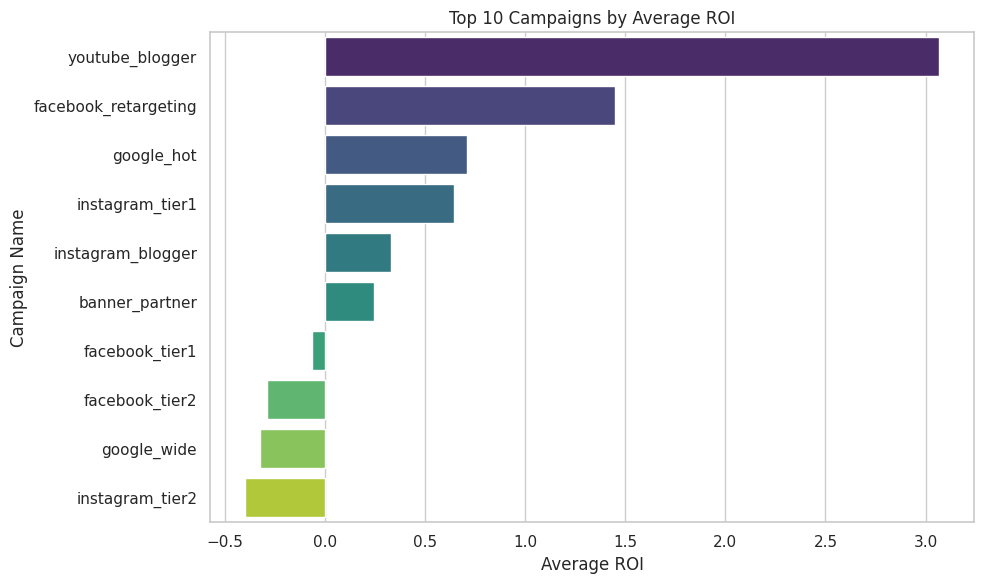

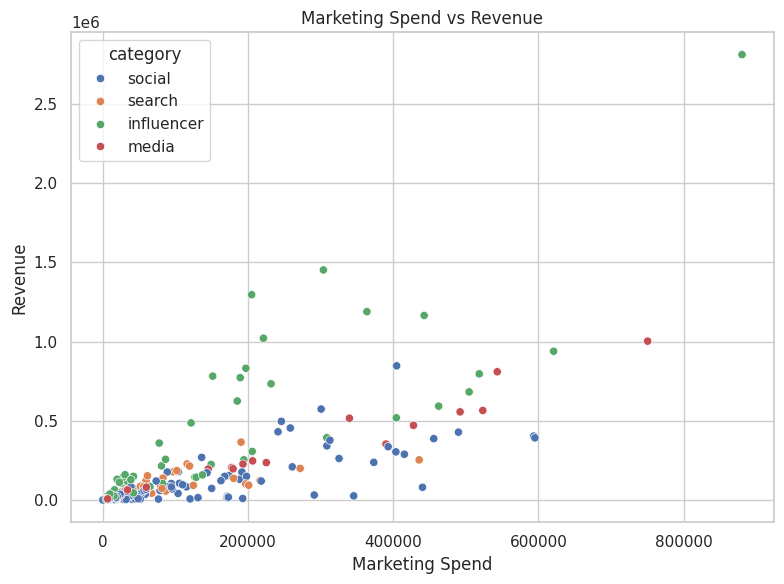

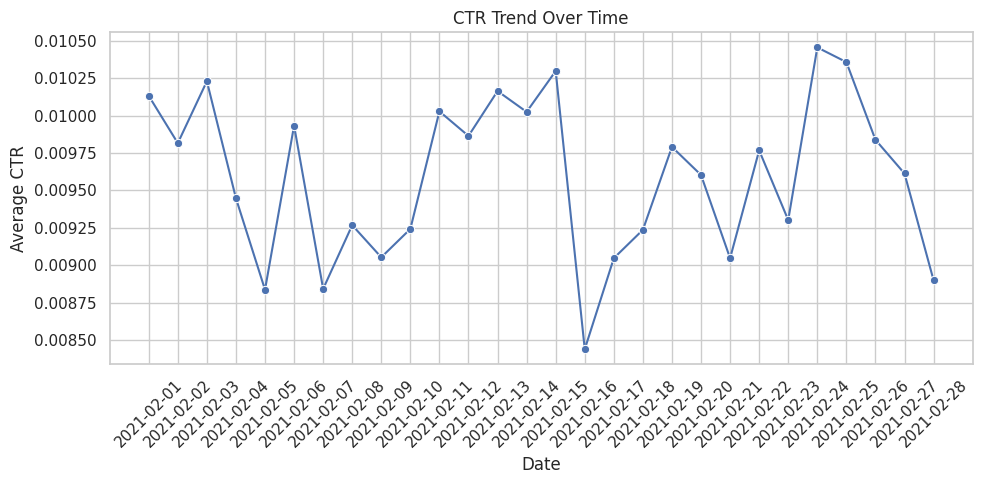

<ipython-input-7-15dfe6a389b2>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_spend, x='mark_spent', y='category', palette='pastel')


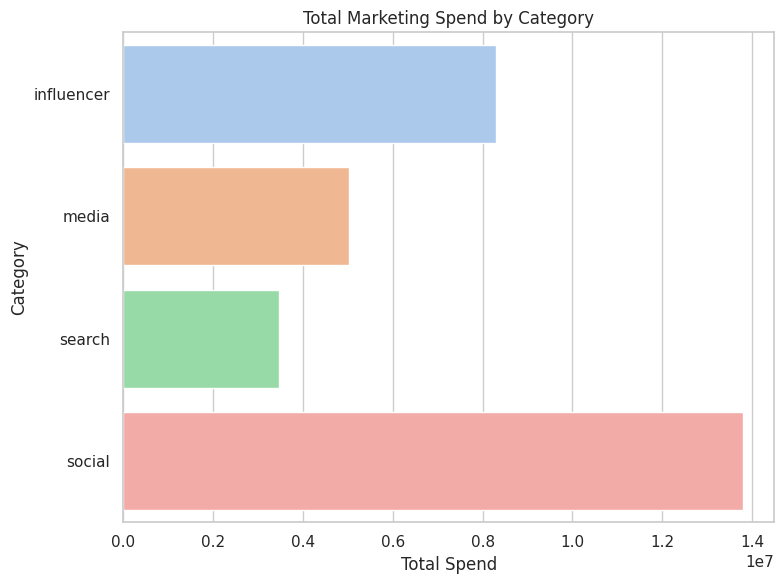

In [7]:
sns.set(style="whitegrid")

# 1. Top 10 Campaigns by Average ROI
top_campaigns = df.groupby('campaign_name')['ROI'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_campaigns.values, y=top_campaigns.index, palette='viridis')
plt.title("Top 10 Campaigns by Average ROI")
plt.xlabel("Average ROI")
plt.ylabel("Campaign Name")
plt.tight_layout()
plt.show()

# 2. Marketing Spend vs Revenue
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='mark_spent', y='revenue', hue='category')
plt.title("Marketing Spend vs Revenue")
plt.xlabel("Marketing Spend")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. CTR Trend Over Time
ctr_trend = df.groupby('c_date')['CTR'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=ctr_trend, x='c_date', y='CTR', marker='o')
plt.title("CTR Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Average CTR")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Total Spend by Category
category_spend = df.groupby('category')['mark_spent'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=category_spend, x='mark_spent', y='category', palette='pastel')
plt.title("Total Marketing Spend by Category")
plt.xlabel("Total Spend")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

In [8]:
with PdfPages('campaign_performance_report.pdf') as pdf:

    # Plot 1: Top Campaigns by ROI
    top_campaigns = df.groupby('campaign_name')['ROI'].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_campaigns.values, y=top_campaigns.index, palette='viridis')
    plt.title("Top 10 Campaigns by Average ROI")
    plt.xlabel("Average ROI")
    plt.ylabel("Campaign Name")
    plt.tight_layout()
    pdf.savefig()
    plt.close()

    # Plot 2: Marketing Spend vs Revenue
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='mark_spent', y='revenue', hue='category')
    plt.title("Marketing Spend vs Revenue")
    plt.xlabel("Marketing Spend")
    plt.ylabel("Revenue")
    plt.grid(True)
    pdf.savefig()
    plt.close()

    # Plot 3: CTR Trend Over Time
    ctr_trend = df.groupby('c_date')['CTR'].mean().reset_index()
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=ctr_trend, x='c_date', y='CTR', marker='o')
    plt.title("CTR Trend Over Time")
    plt.xlabel("Date")
    plt.ylabel("Average CTR")
    plt.xticks(rotation=45)
    plt.tight_layout()
    pdf.savefig()
    plt.close()

    # Plot 4: Spend by Category
    category_spend = df.groupby('category')['mark_spent'].sum().reset_index()
    plt.figure(figsize=(8, 6))
    sns.barplot(data=category_spend, x='mark_spent', y='category', palette='pastel')
    plt.title("Total Marketing Spend by Category")
    plt.xlabel("Total Spend")
    plt.ylabel("Category")
    plt.tight_layout()
    pdf.savefig()
    plt.close()

print("✅ PDF report 'campaign_performance_report.pdf' has been generated.")

<ipython-input-8-60796926436b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_campaigns.values, y=top_campaigns.index, palette='viridis')


✅ PDF report 'campaign_performance_report.pdf' has been generated.


<ipython-input-8-60796926436b>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_spend, x='mark_spent', y='category', palette='pastel')
